# Aplicaciones de Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Resolución de ecuaciones

Encontrar la solución de la siguiente ecuación:
$$f(x) = x^3 + 4 x^2 - 10$$

In [2]:
x = np.arange(-2, 4, 0.1)
fx = x**3 + 4 * x**2 - 10

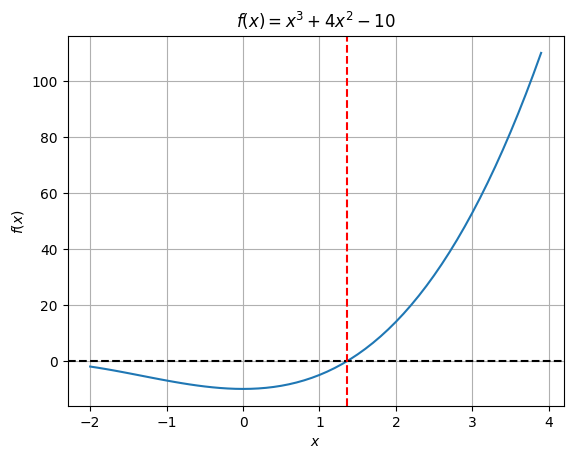

In [3]:
plt.plot(x, fx)
plt.axhline(0, color="black", linestyle="--")
plt.axvline(1.3652, color="red", linestyle="--")
plt.title("$f(x) = x^3 + 4 x^2 - 10$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.show()

In [4]:
# Definir la función:
def f(x):
    return x**3 + 4 * x**2 - 10

### Método de Bisección

$$f(x) = x^3 + 4 x^2 - 10$$

El método consiste en lo siguiente:
- Debe existir seguridad sobre la continuidad de la función $f$ en el intervalo $[a,b]$
- A continuación se verifica que $f(a) \cdot f(b) < 0$
- Se calcula el punto medio $m$ del intervalo $[a, b]$ y se evalúa $f(m)$ si ese valor es igual a cero, ya hemos encontrado la raíz buscada
- En caso de que no lo sea, verificamos si $f(m)$ tiene signo opuesto con $f(a)$ o con $f(b)$
- Se redefine el intervalo $[a,b]$ como $[a,m]$ o $[m,b]$ según se haya determinado en cuál de estos intervalos ocurre un cambio de signo
- Con este nuevo intervalo se continúa sucesivamente encerrando la solución en un intervalo cada vez más pequeño, hasta alcanzar la precisión deseada

<img src="biseccion.png" width="400">

In [10]:
def f(x):
    fx = x**3 + 4 * x**2 - 10
    return fx


a = 0
b = 1

fa = f(a)
fb = f(b)

max_iter = 100
iter = 0
tolerancia = 0.00001

while (iter < max_iter) & (b - a > tolerancia):
    if fa * fb < 0:
        c = (a + b) / 2
        fc = f(c)
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    else:
        print("no hay raíz")
        break
    iter += 1

print(f"raíz en: {b}")
print(f"iteraciones: {iter}")

no hay raíz
raíz en: 1
iteraciones: 0


Una forma más eficiente:

In [11]:
def bisection(f, a, b, xtol=0.00001, maxiter=100):
    if f(b) * f(a) > 0:
        raise ValueError("No existe raíz en el intervalo dado")

    iter = 0
    while iter <= maxiter:
        iter += 1
        c = (a + b) / 2
        if abs(f(c)) <= xtol:
            return c, iter
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c

    raise Exception("El número máximo de iteraciones permitidas ha sido excedido.")

In [16]:
sol, iter = bisection(f, 1, 2, maxiter=20)
print(f"Solucion para f(x)=0: x={sol}")
print(f"Total de iteraciones: {iter}")

Solucion para f(x)=0: x=1.3652305603027344
Total de iteraciones: 18


### Scipy: bisect

In [17]:
from scipy.optimize import bisect

sol_bisect = bisect(f, 1, 2, xtol=0.00001)
print(f"Solucion para f(x)=0: x={sol_bisect}")

Solucion para f(x)=0: x=1.3652267456054688


### Scipy: fsolve

In [18]:
from scipy.optimize import fsolve

punto_inicial = 0.5
sol_fsolve = fsolve(f, punto_inicial)
print(f"Solucion para f(x)=0: x={sol_fsolve[0]}")

Solucion para f(x)=0: x=1.3652300134140962
